# EDA

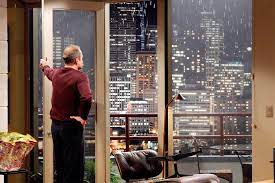

## Stakeholder and her Aims

Our customer calls herself Amy Williams. She's originally from Sicily and speaks with a thick Italian accent but made her requirements very clear:

She owns several central houses that she describes accurately as being in the top 10%. She wants to sell these houses over the course of the next years. The revenue she wants to invest in property that gives her more privacy and makes her stand out less, because she despises flamboyancy. And nosey neighbours. 

We assume that she wants to be able to get as many hideaways as possible for her money.

A basement would be a plus for gambling with good friends and storing concrete-encased objects.

### Research Questions

1. When is a good time to sell central high-profile real estate?
2. Which houses on the outskirt are as average as possible?

### Hypotheses and Guidelines for the House Hunt

1. House prices are higher in spring than during the rest of the year, with a peak in march.
2. The further away from the city centre, the lower the cost per sqft.
3. The further away from the city centre, the larger the basement.
4. Condition strongly correlates with price per sqft.


Guideline: Suitable houses are comparable to the neighbourhood in terms of size and lot.

__Preparation__

To set up the notebook, let's first import the necessary libraries and load the data we want to explore


In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

#I have no idea what the following does, so I commented it out but left it in here because you never know.
#import warnings

#warnings.filterwarnings("ignore")

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [342]:
df_houses = pd.read_csv('data/King_County_House_prices_dataset.csv')

Now let's have a first look at the dataset and explore it's properties.

In [343]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [344]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Here, we already got some interesting information.
Regarding missings, we see that there are a load of missings in the "waterfront" (2376, or 11%) and "yr_renovated" (3842, 17%) column that need to be dealt with. Few missings also can be found in the "view" column (63, 0.3%).
How we deal with these will also depend on our RQs, so we'll deal with those later.

"date" is type object, so is "sqft_basement". Investigate:

In [345]:
type(df_houses['date'][0])

str

It's a string! Convert it to a date:

In [346]:
# change "date" dtype to datetime coming from the format %m/%d/%Y
df_houses['date'] = pd.to_datetime(df_houses['date'], format='%m/%d/%Y')

Check again:

In [347]:
type(df_houses['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Ok, cool. Moving on to the sqft_basement. This should be a float or an integer, so why is it not?

In [348]:
#Check all values for non-integers
df_houses.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Aha! The culprit is a question mark. Let's replace it with a missing value and convert it to a float:

In [349]:
df_houses['sqft_basement'] = df_houses.sqft_basement.replace('?',np.NaN)

df_houses.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,NaN,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [350]:
#df_houses = df_houses.astype({'sqft_basement': int})
df_houses = df_houses.astype({'sqft_basement': float})


In [351]:
df_houses.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [352]:
df_houses.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [353]:
df_houses.bathrooms.value_counts()

2.500    5377
1.000    3851
1.750    3048
2.250    2047
2.000    1930
1.500    1445
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      71
4.750      23
5.000      21
5.250      13
5.500      10
1.250       9
6.000       6
0.500       4
5.750       4
6.750       2
8.000       2
6.250       2
6.500       2
7.500       1
7.750       1
Name: bathrooms, dtype: int64

Ok, time for one more overview: Where are those flats? Let's make a nice geographical map.

###!!!IMPROVE WITH ZIPCODE AND SHIT!!!###

In [354]:
fig = px.scatter_mapbox(df_houses, lat="lat", lon="long", hover_name="id", hover_data=["zipcode","price","grade"],
                        color_discrete_sequence=["blue"], zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # sets the margin from the left, top, right and bottom order
fig.update_layout(title_text='Houses in King County', title_x=0.5) # sets a title for the plot and centers it
fig.show()

Any duplicates?

In [355]:
df_houses[df_houses['id'].duplicated()]

#Nope!

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,2014-12-23,700000.000,3,1.500,1580,5000,1.000,0.000,0.000,...,8,1290,290.000,1939,0.000,98117,47.687,-122.386,1570,4500
314,4139480200,2014-12-09,1400000.000,4,3.250,4290,12103,1.000,0.000,3.000,...,11,2690,1600.000,1997,0.000,98006,47.550,-122.102,3860,11244
325,7520000520,2015-03-11,240500.000,2,1.000,1240,12092,1.000,0.000,0.000,...,6,960,280.000,1922,1984.000,98146,47.496,-122.352,1820,7460
346,3969300030,2014-12-29,239900.000,4,1.000,1000,7134,1.000,0.000,0.000,...,6,1000,0.000,1943,NaN,98178,47.490,-122.240,1020,7138
372,2231500030,2015-03-24,530000.000,4,2.250,2180,10754,1.000,0.000,0.000,...,7,1100,1080.000,1954,0.000,98133,47.771,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2015-02-19,645000.000,4,3.500,2910,5260,2.000,0.000,0.000,...,9,2910,0.000,2012,0.000,98065,47.517,-121.883,2910,5260
20597,2724049222,2014-12-01,220000.000,2,2.500,1000,1092,2.000,0.000,0.000,...,7,990,10.000,2004,0.000,98118,47.542,-122.271,1330,1466
20654,8564860270,2015-03-30,502000.000,4,2.500,2680,5539,2.000,NaN,0.000,...,8,2680,0.000,2013,0.000,98045,47.476,-121.734,2680,5992
20764,6300000226,2015-05-04,380000.000,4,1.000,1200,2171,1.500,0.000,0.000,...,7,1200,0.000,1933,0.000,98133,47.708,-122.342,1130,1598


All right. Time to take a bit of a deeper dive into the house prices. Let's look at how they are distributed.

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64
0   350000.000
1   450000.000
dtype: float64


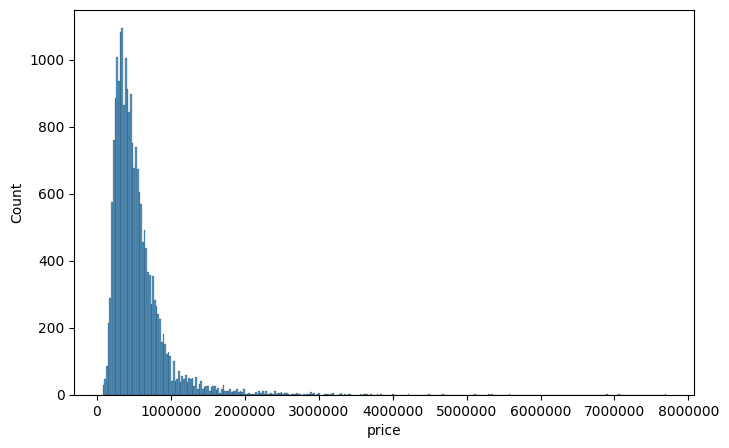

In [356]:
print(df_houses.price.describe())
print(df_houses.price.mode())
sns.histplot(df_houses['price'])
plt.ticklabel_format(style='plain', axis='both')

-162500.0
1129500.0


/Users/fabianklauke/neuefische/ds-eda-project/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



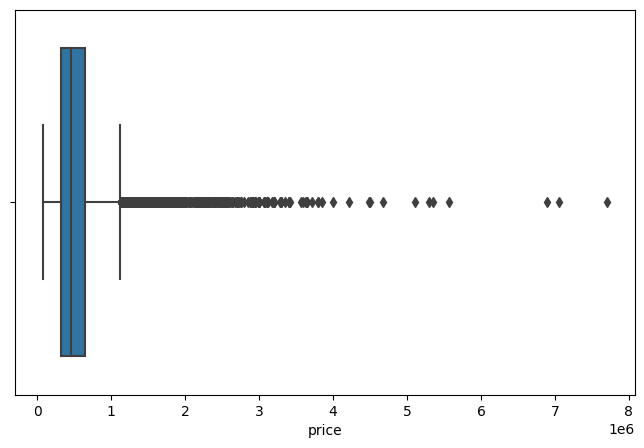

In [357]:
sns.boxplot(df_houses['price'])
q1=df_houses['price'].quantile(0.25)
q3=df_houses['price'].quantile(0.75)
iqr = q3-q1

llim_price = q1 - iqr*1.5
ulim_price = q3 + iqr*1.5

print(llim_price)
print(ulim_price)

Looks slightly positively skewed, with outliers being houses costing more than 1129500 $.

# Answering our Research Questions
## When should our client sell?

Now that we have explored the data, it's time to take a look at our customer. Our customer is a Mafiosa who owns several central houses in the top 10% of the market that she wants to get rid of.
Instead, she looks to purchase a variety of average houses on the outskirts to hide from the fbi.

Thus, we need to identify what's the best time to sell expensive city houses, and what houses in the outskirts are so eye-wateringly boring that nobody would bother to look there.

Let's start by finding the most expensive central houses (which I define as being in the city of Seattle).

In [358]:
#List of Seattle zipcodes
seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98127, 98129, 98131, 98133, 98134, 98136, 98138, 98139, 98141, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98165, 98166, 98168, 98170, 98174, 98175, 98177, 98178, 98181, 98185, 98188, 98190, 98191, 98194, 98195, 98198, 98199]

...and extract year, month and day from the date:

In [359]:
df_houses['year']=df_houses['date'].dt.year
df_houses['month']=df_houses['date'].dt.month
df_houses['weekday']=df_houses['date'].dt.dayofweek

Now create a new dataset.

In [379]:
df_seattle = df_houses.loc[df_houses['zipcode'].isin(seattle)]

df_seattle.nunique()

id               8885
date              361
price            2077
bedrooms           12
bathrooms          26
sqft_living       562
sqft_lot         4011
floors              6
waterfront          2
view                5
condition           5
grade              10
sqft_above        484
sqft_basement     224
yr_built          116
yr_renovated       67
zipcode            29
lat              3143
long              197
sqft_living15     411
sqft_lot15       3456
year                2
month              12
weekday             7
price_sqft       7409
dtype: int64

Find top 10% sales

In [380]:
df_st10 = df_seattle.loc[df_seattle['price']>=df_seattle.price.quantile(0.9)]

df_st10.describe()

df_st10.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month',
       'weekday', 'price_sqft'],
      dtype='object')

<AxesSubplot:xlabel='month', ylabel='price'>

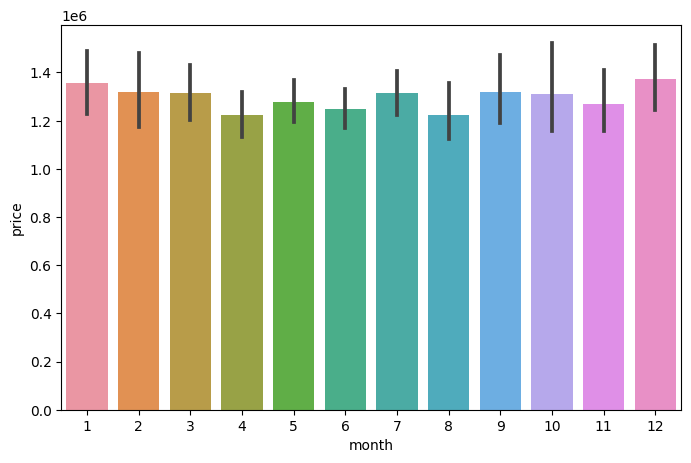

In [381]:
sns.barplot(data=df_st10, x='month', y='price')

Find top 10% by sqft price

/var/folders/jy/dzvsvxv95gggzwht8xmx88yh0000gn/T/ipykernel_8611/1975303358.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='month', ylabel='price_sqft'>

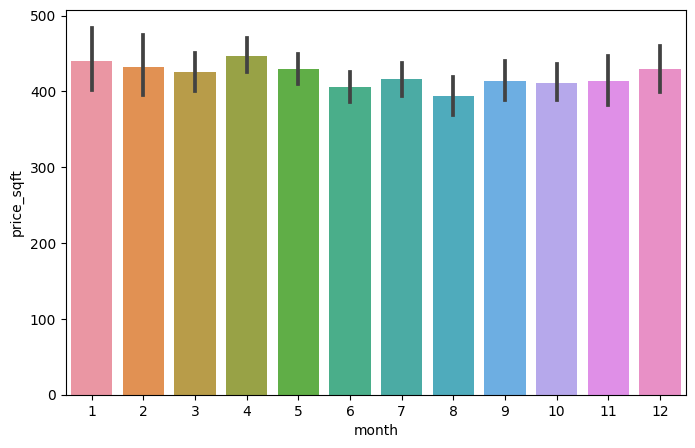

In [382]:
df_seattle['price_sqft']=(df_seattle['price']/df_seattle['sqft_living'])

df_seattle.head(10)

df_st10sq = df_seattle.loc[df_seattle['price']>=df_seattle.price.quantile(0.9)]

df_st10sq.describe()

#df_st10sq.columns

sns.barplot(data=df_st10sq, x='month', y='price_sqft')

What influences sales price?

In [383]:
df_seattle.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month',
       'weekday', 'price_sqft'],
      dtype='object')

In [421]:
from sklearn.linear_model import LinearRegression

y = df_seattle['price']
x = df_seattle[['sqft_living', 'condition', 'grade', 'yr_built', 'sqft_living15']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
print(list(zip(x, mlr.coef_)))

#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Intercept:  3790169.548671972
Coefficients:
[('sqft_living', 140.39967548402936), ('condition', 16791.478756373384), ('grade', 163915.3149368423), ('yr_built', -2535.3006141511364), ('sqft_living15', 113.87357561513538)]
Prediction for test set: [283555.4660574  428282.20605842 577668.25538565 ... 410288.39174506
 604503.17839839 181836.65212959]
R squared: 67.29
Mean Absolute Error: 133045.62060310497
Mean Square Error: 32848778077.937767
Root Mean Square Error: 181242.3186729241


In [436]:
df_seattle['rating']=(df_seattle['sqft_living']*135+df_seattle['condition']*48850+df_seattle['grade']*137400+(df_seattle['yr_built']*(-567))+df_seattle['sqft_living15']*133)

df_seattle.describe()

/var/folders/jy/dzvsvxv95gggzwht8xmx88yh0000gn/T/ipykernel_8611/3063349042.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,weekday,price_sqft,rating
count,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000,7973.000,8946.000,8973.000,...,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000,8973.000
mean,4603227499.785,535085.600,3.171,1.894,1795.344,6455.840,1.461,0.008,0.302,3.439,...,98133.639,47.613,-122.332,1682.805,6182.386,2014.321,6.599,2.006,304.788,534104.078
std,2843007448.247,340518.631,1.037,0.787,798.026,5425.186,0.588,0.091,0.857,0.702,...,28.172,0.096,0.041,500.376,4299.354,0.467,3.114,1.462,115.639,275416.049
min,1200019.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,98102.000,47.343,-122.416,460.000,651.000,2014.000,1.000,0.000,87.647,-246431.000
25%,2171400218.000,337000.000,3.000,1.000,1240.000,3904.000,1.000,0.000,0.000,3.000,...,98115.000,47.538,-122.366,1340.000,4000.000,2014.000,4.000,1.000,218.182,364553.000
50%,4022906430.000,453000.000,3.000,1.750,1640.000,5589.000,1.000,0.000,0.000,3.000,...,98122.000,47.635,-122.333,1580.000,5583.000,2014.000,6.000,2.000,290.698,487421.000
75%,7234600098.000,630000.000,4.000,2.500,2190.000,7815.000,2.000,0.000,0.000,4.000,...,98148.000,47.688,-122.299,1910.000,7740.000,2015.000,9.000,3.000,373.810,656016.000
max,9900000190.000,7700000.000,33.000,8.000,12050.000,137214.000,3.500,1.000,4.000,5.000,...,98199.000,47.778,-122.220,4950.000,128066.000,2015.000,12.000,6.000,810.139,3049400.000


AttributeError: 'Rectangle' object has no property 'errorbar'

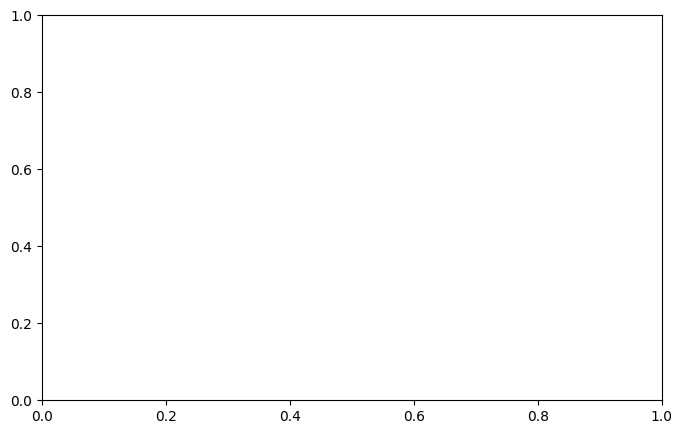

In [450]:
df_t10r = df_seattle.loc[df_seattle['rating']>=df_seattle.rating.quantile(0.9)]

df_t10r.describe()

#df_st10sq.columns

sns.barplot(data=df_t10r, x='month', y='price', estimator=np.median)

df_t10r.groupby('month')['price'].describe()

In [429]:
import statsmodels.api as sm

y = df_seattle['price']
x_columns = ['sqft_living', 'condition', 'grade', 'yr_built', 'sqft_living15']

def get_stats():
    x = df_seattle[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                          1.594e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                        0.00
Time:                        22:07:19   Log-Likelihood:                     -1.2233e+05
No. Observations:                8973   AIC:                                  2.447e+05
Df Residuals:                    8968   BIC:                                  2.447e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Low-sales areas (less populated)


________________________


In [292]:
df_houses.zipcode.value_counts().tail(10)

98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, dtype: int64

In [ ]:
df_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df_houses['sqft_above_living'] = df_houses['sqft_above']-df_houses['sqft_basement']

df_houses['price_sqft'] = df_houses['price']/df_houses['sqft_living']

df_houses[['sqft_above_living', 'sqft_above', 'sqft_living', 'sqft_basement']].head(25)

,sqft_above_living,sqft_above,sqft_living,sqft_basement
0,1180.000,1180,1180,0.000
1,1770.000,2170,2570,400.000
2,770.000,770,770,0.000
3,140.000,1050,1960,910.000
4,1680.000,1680,1680,0.000
5,2360.000,3890,5420,1530.000
6,NaN,1715,1715,NaN
7,1060.000,1060,1060,0.000
8,320.000,1050,1780,730.000
9,1890.000,1890,1890,0.000


In [ ]:
df_houses.dtypes

In [ ]:
print(df_houses.head())
print(df_houses.info())
print(df_houses.describe())
df_houses.nunique()

In [ ]:
df_houses.view.unique()
print(df_houses.price.describe())

sns.histplot(df_houses, x='price')

In [ ]:
fig = px.scatter_mapbox(df_houses, lat="lat", lon="long", hover_name="id", hover_data=["zipcode","price","grade"],
                        color_discrete_sequence=["blue"], zoom=8, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}) # sets the margin from the left, top, right and bottom order
fig.update_layout(title_text='Houses in King County', title_x=0.5) # sets a title for the plot and centers it
fig.show()

In [ ]:
from urllib.request import urlopen
import json
zips = json.load('data/wa_washington_zip_codes_geo.min.json')


In [ ]:



zips = json.load('data/wa_washington_zip_codes_geo.min.json')

fig = px.choropleth_mapbox(
    data_frame=df_houses,
    geojson=zips,
    locations='zipcode',
    color='price',
    mapbox_style='carto_positron',
    zoom=10,
    height=700,
    color_continuous_scale=['green', 'blue', 'red', 'gold'],
    title='Zipcode by Average Price',
    labels={'price': 'Average Price'},
    opacity=.7,
    center={
        'lat': df_houses.lat.mode()[0],
        'lon': df_houses.long.mode()[0]
        })
fig.update_geos(fitbounds='locations', visible=True)
fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
fig.show()